In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
sns.set_style('whitegrid')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import os
os.chdir('..')

In [6]:
data = pd.read_csv("data.csv")
data = data[['author', 'selftext', 'title', 'body_image']]

In [7]:
tf = TfidfVectorizer()
X = tf.fit_transform(data['selftext'])

In [8]:
X

<1045x9083 sparse matrix of type '<class 'numpy.float64'>'
	with 127507 stored elements in Compressed Sparse Row format>

Text(0, 0.5, 'WCSS')

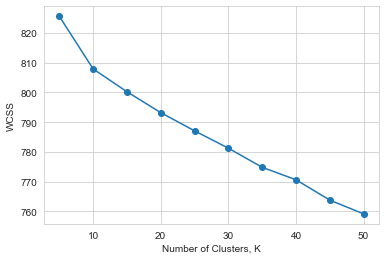

In [11]:
# this takes a long time to run
wcss_news = []
for k in range(5,51,5):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss_news.append(kmeans.inertia_)
plt.plot(np.arange(5,51,5),wcss_news,marker="o")
plt.xlabel('Number of Clusters, K')
plt.ylabel('WCSS')

In [14]:
k = 35
kmeans = MiniBatchKMeans(k)
kmeans.fit(X)
labs = kmeans.predict(X)

In [15]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

In [16]:
terms = tf.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()


Cluster 0: firstborn and him tonight my was tranny realization knuckles bruised
Cluster 1: finally lessen compatible transitioning enemy blow physician correctly mamas my
Cluster 2: imagining imagination hijacked mind overactive my scenario 21f to but
Cluster 3: counseling thinking mother me my quicker recognized wants ask techniques
Cluster 4: she forum her friend to help and belgium classical covid19
Cluster 5: removed zulressotm exposure exs expressway expressing expresses expressed express exposed
Cluster 6: fatigue it conclude sleepiness persists 30yo the ongoing weakness monthly
Cluster 7: deleted zulressotm exposure exs expressway expressing expresses expressed express exposed
Cluster 8: son my and slept guilty the he of to that
Cluster 9: labour daddy baby the during he called pain stands closure
Cluster 10: and to day him week work constantantly continent luxury angsiety
Cluster 11: her cried angry she burp and emotions upset hit because
Cluster 12: you are fighting women doul

In [17]:
Xdf = pd.DataFrame(X.toarray(), columns=tf.get_feature_names())

In [18]:
Xdf.head(2)

,000,0000,00pm,04,0730,08,10,100,1000,100lbs,...,zero,zip,zippered,zippering,zoloft,zombie,zone,zoom,zulresso,zulressotm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
Xdf.shape

(1045, 9083)

In [21]:
#dimensionality reduction using Trucated SVD (singular value decomposition)
# can be used for sparse matrices

from sklearn.decomposition import TruncatedSVD

In [22]:
svd = TruncatedSVD(n_components=2)
comps = svd.fit_transform(X)

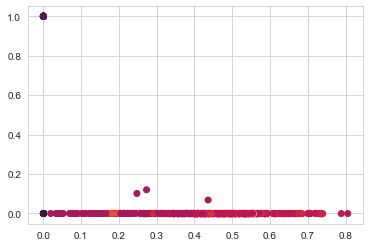

In [25]:
plt.scatter(comps[:,0], comps[:,1], c=kmeans.labels_)

In [34]:
import gensim
from gensim.utils import simple_preprocess

In [35]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data1 = data.selftext.values.tolist()
data_words = list(sent_to_words(data1))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashtynhaynes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['traumatic', 'delivery', 'knew', 'something', 'wrong', 'sure', 'feel', 'bonded', 'daughter', 'assured', 'normal', 'would', 'come', 'time', 'first', 'two', 'weeks', 'get', 'much', 'readdmited', 'er', 'infection', 'husband', 'want', 'admitted', 'could', 'got', 'home', 'started', 'bed']


In [36]:


import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 3), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 3), (24, 5), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [37]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
 
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"feel" + 0.012*"like" + 0.010*"time" + 0.009*"baby" + 0.008*"help" + '
  '0.007*"know" + 0.007*"ppd" + 0.007*"get" + 0.006*"would" + 0.006*"want"'),
 (1,
  '0.018*"like" + 0.017*"feel" + 0.010*"get" + 0.009*"time" + 0.009*"want" + '
  '0.007*"baby" + 0.007*"help" + 0.006*"know" + 0.006*"never" + 0.006*"even"'),
 (2,
  '0.019*"like" + 0.017*"feel" + 0.009*"time" + 0.009*"baby" + 0.009*"husband" '
  '+ 0.009*"get" + 0.009*"know" + 0.008*"want" + 0.006*"one" + 0.006*"life"'),
 (3,
  '0.014*"feel" + 0.010*"baby" + 0.009*"want" + 0.009*"like" + 0.009*"know" + '
  '0.007*"get" + 0.007*"time" + 0.006*"would" + 0.005*"help" + 0.005*"even"'),
 (4,
  '0.011*"feel" + 0.010*"like" + 0.009*"know" + 0.008*"time" + 0.008*"baby" + '
  '0.007*"help" + 0.007*"want" + 0.006*"get" + 0.006*"really" + 0.006*"even"'),
 (5,
  '0.010*"get" + 0.009*"baby" + 0.008*"want" + 0.007*"time" + 0.007*"know" + '
  '0.007*"like" + 0.007*"day" + 0.007*"feel" + 0.007*"would" + 0.006*"sleep"'),
 (6,
  '0.013*"

In [48]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.011948  0.001448       1        1  22.679577
8      0.007665 -0.007302       2        1  15.014921
0      0.009331  0.013878       3        1  13.077449
9      0.003676 -0.014046       4        1  12.244453
4      0.001169  0.010836       5        1  10.009663
3      0.000497  0.001493       6        1   6.334421
6     -0.001442 -0.004099       7        1   6.167304
1      0.002488  0.000065       8        1   6.001078
5     -0.010724 -0.008252       9        1   5.674842
7     -0.024609  0.005980      10        1   2.796292, topic_info=         Term         Freq        Total Category  logprob  loglift
48        get   954.000000   954.000000  Default  30.0000  30.0000
13       baby  1231.000000  1231.000000  Default  29.0000  29.0000
42       feel  1659.000000  1659.000000  Default  28.0000  28.0000
69       know   858.000000   858.000000  Default  27.0000  27.0000
73       like  1553.000000  1553.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
152     would    12.974311   602.834696  Topic10  -5.4816  -0.2618
50        got    10.895065   399.187590  Topic10  -5.6562  -0.0242
24   daughter     9.938131   324.691989  Topic10  -5.7482   0.0904
61    husband    11.328882   574.572031  Topic10  -5.6172  -0.3494
87      never    10.238647   420.688146  Topic10  -5.7184  -0.1388

[780 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.184004      able
0         2  0.167276      able
0         3  0.195156      able
0         4  0.100366      able
0         5  0.072486      able
...     ...       ...       ...
3303      3  0.138581       yrs
3303      4  0.138581       yrs
3303      8  0.138581       yrs
3303      9  0.277161       yrs
5335      8  0.435796  zbrdlzvb

[1758 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 1, 10, 5, 4, 7, 2, 6, 8])

/Users/ashtynhaynes/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ashtynhaynes/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ashtynhaynes/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
